# Assignment 3
### Due 9/23. Do four of five.
#### Name: Shaveen Saadee

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nhanes = pd.read_csv('/Users/shaveen/understanding_uncertainty/data/nhanes_data_17_18.csv')
nhanes

/var/folders/wr/66f4zf893q541yt3pc0dq3_00000gn/T/ipykernel_77131/2920058846.py:6: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhanes = pd.read_csv('/Users/shaveen/understanding_uncertainty/data/nhanes_data_17_18.csv')


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
8362,102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
8363,102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never
8364,102955.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
nhanes['smoke_na'] = nhanes['DoYouNowSmokeCigarettes'].isna()
nhanes['smoke_na'].value_counts()

smoke_na
True     6134
False    2232
Name: count, dtype: int64

In [20]:
nhanes['marital_na'] = nhanes['MaritalStatus'].isna()
nhanes['marital_na'].value_counts()

marital_na
False    5260
True     3106
Name: count, dtype: int64

In [21]:
pd.crosstab(
    nhanes['MaritalStatus'], 
    nhanes['DoYouNowSmokeCigarettes'], 
    normalize='index')

DoYouNowSmokeCigarettes,Every day,Not at all,Some days
MaritalStatus,,,
Divorced,0.393846,0.535385,0.070769
Living with partner,0.514523,0.365145,0.120332
Married,0.251497,0.674651,0.073852
Never married,0.487179,0.367521,0.145299
Separated,0.329545,0.522727,0.147727
Widowed,0.253731,0.681592,0.064677


>
> Based on this data, 51% of individuals living with their partner report smoking every day, which is the highest proportion among all marital status groups. In contrast, married and widowed individuals have the lowest rates, with only 25% reporting daily smoking.
> 
> A majority of widowed individuals (68%) indicate that they have never smoked, compared with 36% of those living with a partner and those who have never married. 14% of individuals who have separated or never been married each claim to smoke some days.
> 
> It's important to note that there are several thousand missing values for these columns, of which 3106 are missing in MaritalStatus and 6134 are missing in DoYouNowSmokeCigarettes. As a result, the observed percentages may not fully represent the broader population of the dataset.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [22]:
nhanes['health_na'] = nhanes['GeneralHealthCondition'].isna()
nhanes['health_na'].value_counts()

health_na
False    5964
True     2402
Name: count, dtype: int64

In [23]:
nhanes['inc_na'] = nhanes['RatioOfFamilyIncomeToPoverty'].isna()
nhanes['inc_na'].value_counts()

inc_na
False    7332
True     1034
Name: count, dtype: int64

In [24]:
nhanes.loc[:,['inc_na','GeneralHealthCondition']].groupby('GeneralHealthCondition').mean()

,inc_na
GeneralHealthCondition,
Excellent,0.103393
Fair or,0.142979
Good,0.114099
Poor?,0.180233
Very good,0.115933


In [25]:
nhanes['GeneralHealthCondition'] = nhanes['GeneralHealthCondition'].fillna('Unspecified')
pd.crosstab(nhanes['GeneralHealthCondition'],nhanes['inc_na'])

inc_na,False,True
GeneralHealthCondition,,
Excellent,555,64
Fair or,1007,168
Good,2174,280
Poor?,141,31
Unspecified,2090,312
Very good,1365,179


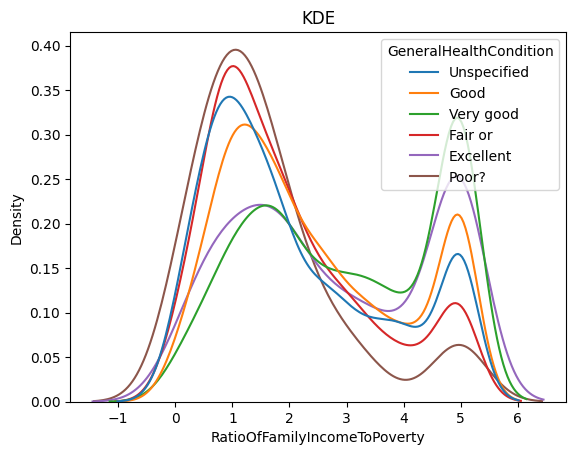

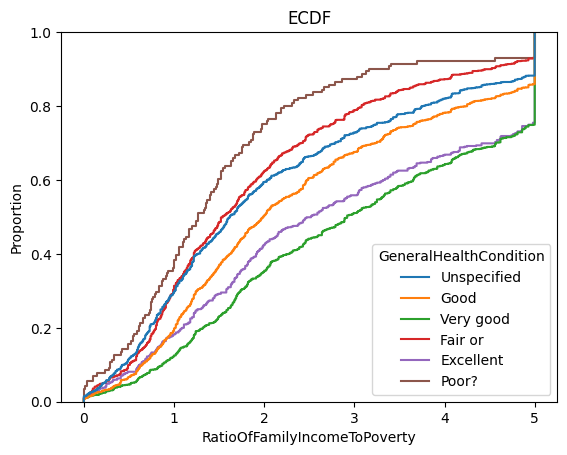

RatioOfFamilyIncomeToPoverty                      \
                                              count      mean       std   
GeneralHealthCondition                                                    
Excellent                                     555.0  2.794144  1.710426   
Fair or                                      1007.0  1.948143  1.399251   
Good                                         2174.0  2.405846  1.548411   
Poor?                                         141.0  1.576383  1.276729   
Unspecified                                  2090.0  2.117292  1.559007   
Very good                                    1365.0  2.996418  1.624742   

                                                              
                                 min   25%   50%    75%  max  
GeneralHealthCondition                                        
Excellent               5.397605e-79  1.28  2.52  4.955  5.0  
Fair or                 5.397605e-79  0.89  1.54  2.735  5.0  
Good                    5.397605e-79  1.14  1.99  3.650  5.0  
Poor?                   5.397605e-79  0.74  1.27  1.980  5.0  
Unspecified             5.397605e-79  0.87  1.62  3.230  5.0  
Very good               5.397605e-79  1.60  2.92  5.000  5.0

In [26]:
health = 'GeneralHealthCondition'
sns.kdeplot( data=nhanes, x='RatioOfFamilyIncomeToPoverty', hue=health, common_norm=False ).set(title='KDE')
plt.show()
sns.ecdfplot( data=nhanes, x='RatioOfFamilyIncomeToPoverty', hue=health).set(title='ECDF')
plt.show()
nhanes.loc[:,['RatioOfFamilyIncomeToPoverty', health]].groupby(health).describe()

> Based on the Kernel Density plot, families with lower income-to-poverty ratios generally tend to report poorer health conditions, whereas those with higher ratios are more likely to report 'very good' overall health conditions. 
> 
> An interesting pattern shown by the kernel density plot is that general health outcomes flip with changes in the income-to-poverty ratio. As the ratio increases, families tend to report fewer poor health conditions and more favorable overall health. Conversely, lower income-to-poverty ratios are associated with higher rates of poor health and fewer positive health outcomes.
> 
> This information is supported by the ecdf plot. For example, 80% of individuals with poor health have a family income-to-poverty ratio of 2 or less.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

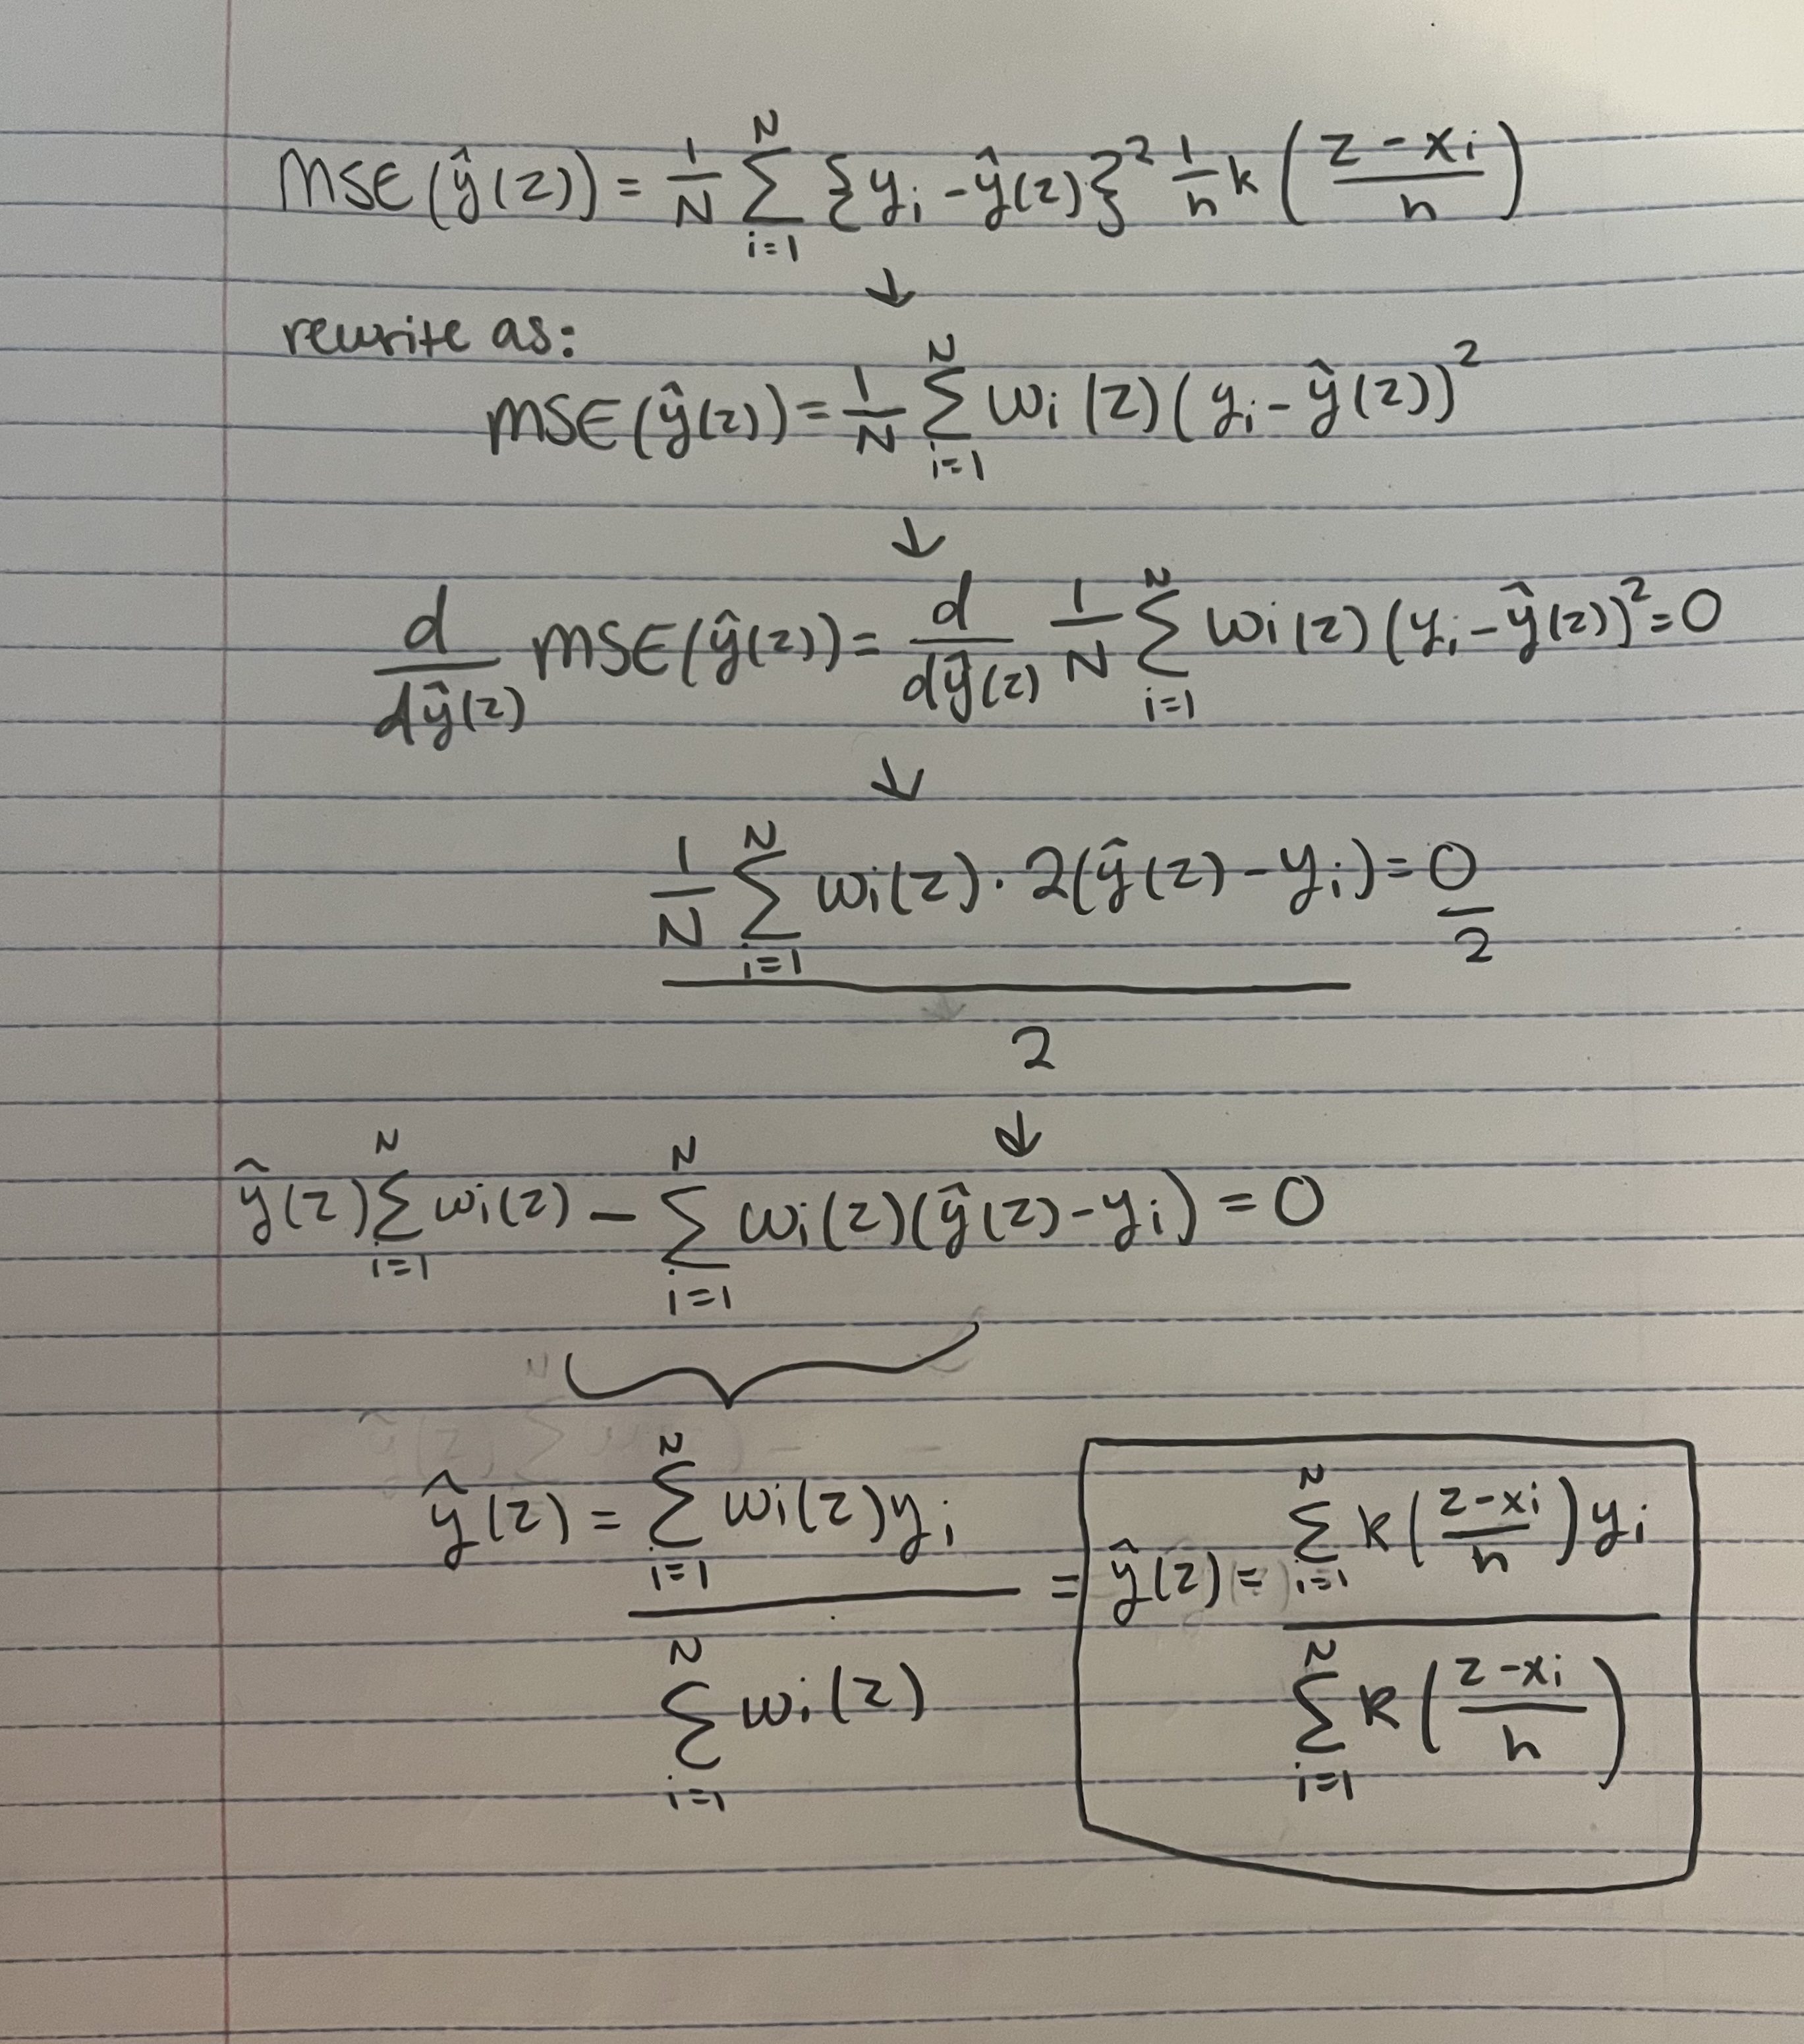

In [55]:
from IPython import display
display.Image('/Users/shaveen/understanding_uncertainty/DS-5030-UU/IMG_1557.jpeg')

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [46]:
df = pd.read_csv('/Users/shaveen/understanding_uncertainty/data/ames_prices.csv', low_memory=False)
df

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,1003,142500,80,RL,37.0,7937,Pave,NaN,...,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal
2926,2927,923276100,902,131000,20,RL,NaN,8885,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal
2927,2928,923400125,970,132000,85,RL,62.0,10441,Pave,NaN,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2928,2929,924100070,1389,170000,20,RL,77.0,10010,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal


In [52]:
df['sqrt_bsmt'] = np.where(df['Total.Bsmt.SF'] > 0, np.sqrt(df['Total.Bsmt.SF']), 0)
df['sqrt_price'] = np.where(df['price'] > 0, np.sqrt(df['price']), 0)

Computed bandwidth is: 1.0771414392217669


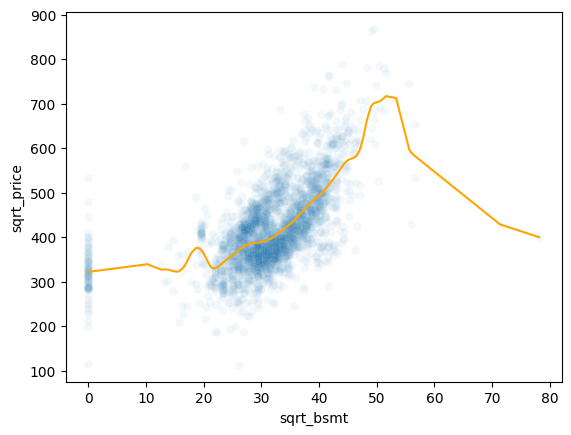

In [ ]:
x = df['sqrt_bsmt']
y = df['sqrt_price']

def lcls(x,y, h = None, plot=True):
    ''' Computes local constant least squares regression estimates with Gaussian kernel. '''

    n = len(x) # Number of observations
    grid = np.sort(x.unique()) # Extract and sort unique values for x

    # Compute bandwidth, if none provided:
    if h is None:
        iqr = np.quantile(x,.75) - np.quantile(x,.25)
        h = 0.9 * min(np.std(x), iqr/1.34) * len(x) **(-0.2)
        print(f'Computed bandwidth is: {h}')

    # Compute kernel:
    I = -(x.to_numpy().reshape(-1,1)-grid.reshape(1,-1))**2
    K = np.exp(I/(2*h**2) )/np.sqrt(2*np.pi*h**2)

    # Compute LCLS estimator:
    numerator = y@K # Compute the numerator
    denominator = np.sum(K,axis=0) # Compute denominator
    y_hat = numerator/denominator # Compute estimator

    # Plot results:
    if plot:
        sns.scatterplot(data=df, y='sqrt_price', x='sqrt_bsmt',alpha=.05)
        sns.lineplot(x=grid,y=y_hat, color='orange')

    return y_hat, grid

y_hat, grid = lcls(x,y)

> This plot shows that the greater the square footage of the basement in a home, the greater the home's price. There are a few outliers which show a much greater basement square footage, but the price of the home is lower.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome